In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14172661592964352940,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 23399170048
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1801856177508771233
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"]

# 1. 이미지 전처리

## 1) path 설정

### train_data

In [5]:
train_data_original_img_path = './data/train_data/original_img'
train_data_resized_img_path = './data/train_data/resized_img(512x512)'

### test_data

In [6]:
test_data_original_img_path = './data/test_data/original_img'
test_data_resized_img_path = './data/test_data/resized_img(512x512)'

## 2) 이미지 목록 확인

In [7]:
import glob
import os
from os import listdir, makedirs
from os.path import isfile, join

In [8]:
def find_img_name_list(original_img_path) :
    img_name_list = list(filter(lambda f: isfile(join(original_img_path, f)), listdir(original_img_path)))
    
    return img_name_list

### train_data

In [9]:
train_data_img_name_list = find_img_name_list(train_data_original_img_path)

In [10]:
print(len(train_data_img_name_list))
print(train_data_img_name_list[:3])

988
['ILSVRC2012_val_00001157.jpg', 'ILSVRC2012_val_00030120.jpg', 'ILSVRC2012_val_00001857.jpg']


### test_data

In [67]:
test_data_img_name_list = find_img_name_list(test_data_original_img_path)

In [12]:
print(len(test_data_img_name_list))
print(test_data_img_name_list[:3])

99
['ILSVRC2012_val_00040557.jpg', 'ILSVRC2012_val_00002728.jpg', 'ILSVRC2012_val_00025052.jpg']


## 3) 흑백 이미지 삭제

In [13]:
from PIL import Image
import os
import numpy as np
import time
from IPython.display import clear_output

In [14]:
def remove_gray_img(img_name_list, original_img_path) :
    start = time.time()

    i = 0
    for img_name in img_name_list:
        
        clear_output(wait=True)
        
        original_img = Image.open(os.path.join(original_img_path, img_name))
        pix = np.array(original_img)
        if pix.ndim != 3 :
            os.remove(os.path.join(original_img_path, img_name))
            
        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')

### train_data

In [15]:
remove_gray_img(train_data_img_name_list, train_data_original_img_path)
train_data_img_name_list = list(filter(lambda f: isfile(join(train_data_original_img_path, f)), listdir(train_data_original_img_path)))

진행 상황 :  988 / 988
진행 시간 :  6.75
총 걸린 시간 :  6.75 초


### test_data

In [16]:
remove_gray_img(test_data_img_name_list, test_data_original_img_path)
test_data_img_name_list = list(filter(lambda f: isfile(join(test_data_original_img_path, f)), listdir(test_data_original_img_path)))

진행 상황 :  99 / 99
진행 시간 :  0.26
총 걸린 시간 :  0.26 초


## 4) 원본 이미지의 사이즈 저장

In [17]:
from PIL import Image
import pickle

In [18]:
def make_original_img_size_list(img_name_list, original_img_path) :
    original_img_size_list = []
    for img_name in img_name_list:
        original_img = Image.open(os.path.join(original_img_path, img_name))
        original_img_size_list.append(original_img.size)
    
    return original_img_size_list

In [19]:
import pickle

In [20]:
def save_object_by_pickle(obj, file_path):
    pickle.dump(obj, open(file_path, 'wb'), protocol=4)

def load_object_by_pickle(pklfile):
    return pickle.load(open(pklfile, 'rb'))

### test_data (만 필요) 

In [21]:
test_data_original_img_size_list = make_original_img_size_list(test_data_img_name_list, test_data_original_img_path)

In [22]:
print(len(test_data_original_img_size_list))
print(test_data_original_img_size_list[:3])

99
[(300, 450), (300, 450), (300, 340)]


In [23]:
test_data_original_img_size_path = './data/test_data/original_img_size.pkl'

In [24]:
save_object_by_pickle(test_data_original_img_size_list, test_data_original_img_size_path)

## 5) resized 및 저장

In [25]:
import cv2
import time
from IPython.display import clear_output

In [26]:
def resizing_img(img_name_list, original_img_path, resized_img_path, resize_size) :
    start = time.time()

    i = 0
    for img_name in img_name_list :

        clear_output(wait=True)


        try:
            original_img = cv2.imread(os.path.join(original_img_path, img_name))
            resized_img = cv2.resize(original_img, dsize = resize_size, interpolation = cv2.INTER_CUBIC)
            cv2.imwrite(os.path.join(resized_img_path, img_name), resized_img)
        except:
            print('{}가 변환되지 않았습니다.'.format(img_name))


        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')

### train_data

In [27]:
resizing_img(train_data_img_name_list, train_data_original_img_path, train_data_resized_img_path, (512, 512))

진행 상황 :  87 / 

KeyboardInterrupt: 

### test_data

In [ ]:
resizing_img(test_data_img_name_list, test_data_original_img_path, test_data_resized_img_path, (512, 512))

# 2. 이미지 불러오기

## 함수화

In [1]:
from tensorflow.keras import datasets, utils, backend
import tensorflow as tf
import ssl
import pickle
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
def load_my_img(img_name_list, resized_img_path) :
    start = time.time()

    i = 0
    
    img_pixel_list = [0]*len(img_name_list)
    for img_name in img_name_list :

        clear_output(wait=True)


        resized_img = Image.open(os.path.join(resized_img_path, img_name))
        pixel_array = np.array(resized_img)
        pixel_list = pixel_array.tolist()
        img_pixel_list[i] = pixel_list

        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')
    
    img = np.array(img_pixel_list)
    
    return img

In [3]:
class DATA():
    def __init__(self, train_img, test_img):
        
        x_train = train_img
        x_test = test_img

        if backend.image_data_format() == 'channels_first':
            n_ch, img_rows, img_cols = x_train.shape[1:]
            input_shape = (1, img_rows, img_cols)
        else:
            img_rows, img_cols, n_ch = x_train.shape[1:]
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0
    
        def RGB2Gray(img, fmt):
            if fmt == 'channels_first':
                R = img[:, 0:1]
                G = img[:, 1:2]
                B = img[:, 2:3]
            else:
                R = img[..., 0:1]
                G = img[..., 1:2]
                B = img[..., 2:3]
            return 0.299 * R + 0.587 * G + 0.114 * B
    
        x_train_in = RGB2Gray(x_train, backend.image_data_format())
        x_test_in = RGB2Gray(x_test, backend.image_data_format())

        self.input_shape = input_shape
        self.x_train_in, self.x_train_out = x_train_in, x_train
        self.x_test_in, self.x_test_out = x_test_in, x_test
        self.n_ch = n_ch

In [4]:
def save_object_by_pickle(obj, file_path):
    pickle.dump(obj, open(file_path, 'wb'), protocol=4)

def load_object_by_pickle(pklfile):
    return pickle.load(open(pklfile, 'rb'))

## 이미지 rgb값 불러오기 & 저장

### train_data

In [ ]:
train_img_pixel_values = load_my_img(train_data_img_name_list, train_data_resized_img_path)

In [ ]:
train_data_img_pixel_values_path = './data/train_data/img_pixel_values.pkl'

In [ ]:
save_object_by_pickle(train_img_pixel_values, train_data_img_pixel_values_path)

### test_data

In [ ]:
test_img_pixel_values = load_my_img(test_data_img_name_list, test_data_resized_img_path)

In [ ]:
test_data_img_pixel_values_path = './data/test_data/img_pixel_values.pkl'

In [ ]:
save_object_by_pickle(test_img_pixel_values, test_data_img_pixel_values_path)

## train_test_dataset 구축

In [5]:
train_data_img_pixel_values_path = './data/train_data/img_pixel_values.pkl'
test_data_img_pixel_values_path = './data/test_data/img_pixel_values.pkl'

In [6]:
train_img = load_object_by_pickle(train_data_img_pixel_values_path)
test_img = load_object_by_pickle(test_data_img_pixel_values_path)

In [7]:
data = DATA(train_img, test_img)
print(data.input_shape, data.x_train_in.shape)

(512, 512, 1) (988, 512, 512, 1)


# 3. 모델 구축

## 함수화

In [8]:
from tensorflow.keras import models, backend
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, BatchNormalization, Concatenate, Activation

In [9]:
class UNET(models.Model):
    def __init__(self, org_shape, n_ch):
        ic = 3 if backend.image_data_format() == 'channels_last' else 1

        # 수축
        def conv(x, n_f, mp_flag=True):
            x = MaxPooling2D((2, 2), padding='same')(x) if mp_flag else x
            x = Conv2D(n_f, (3, 3), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            x = Dropout(0.05)(x)
            x = Conv2D(n_f, (3, 3), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            return x
        
        # 확장
        def deconv_unet(x, e, n_f):
            x = UpSampling2D((2, 2))(x)
            x = Conv2D(n_f, (2, 2), padding='same')(x)
            x = Concatenate(axis=ic)([x, e])
            x = Conv2D(n_f, (3, 3), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            x = Conv2D(n_f, (3, 3), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            return x

        # Input
        original = Input(shape=org_shape)

        # Encoding
        e1 = conv(original, 64, mp_flag=False)
        e2 = conv(e1, 128)
        e3 = conv(e2, 256)
        e4 = conv(e3, 512)

        encoded = conv(e4, 1024)

        # Decoding
        x = deconv_unet(encoded, e4, 512)
        x = deconv_unet(x, e3, 256)
        x = deconv_unet(x, e2, 128)
        x = deconv_unet(x, e1, 64)

        decoded = Conv2D(n_ch, (1, 1), padding='same')(x)

        super().__init__(original, decoded)
        self.compile(optimizer='adam', loss='mse')

## 모델링

In [10]:
unet = UNET(data.input_shape, data.n_ch)
unet.summary()

Model: "unet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 64) 0           batch_normalization[0][0]        
_______________________________________________________________________________________________

# 4. 학습 과정 그래프 출력 함수

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

# 5. 모델 학습

## 하이퍼파라미터 설정

In [13]:
epochs=100
batch_size=8
img_size = 512

## 콜백함수 정의

In [14]:
import tensorflow.keras

In [15]:
model_save_folder = './data/trained_model/unet_model_img_size_{}-batch_size_{}-'.format(img_size, batch_size)
model_filename = model_save_folder + '{epoch}-{val_loss:.4f}-{loss:.4f}.h5'

In [16]:
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(model_filename, minitor='val_loss', mode='min', save_best_only=True)

## 학습 진행

In [17]:
history = unet.fit(data.x_train_in, data.x_train_out,
                   epochs=epochs,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_split=0.2,
                   callbacks=[earlystopping])

Epoch 1/100
99/99 [==============================] - 71s 641ms/step - loss: 0.0468 - val_loss: 0.0953
Epoch 2/100
99/99 [==============================] - 59s 598ms/step - loss: 0.0138 - val_loss: 0.0699
Epoch 3/100
99/99 [==============================] - 59s 600ms/step - loss: 0.0134 - val_loss: 0.0531
Epoch 4/100
99/99 [==============================] - 59s 600ms/step - loss: 0.0124 - val_loss: 0.0383
Epoch 5/100
99/99 [==============================] - 59s 601ms/step - loss: 0.0119 - val_loss: 0.0276
Epoch 6/100
99/99 [==============================] - 59s 601ms/step - loss: 0.0112 - val_loss: 0.0200
Epoch 7/100
99/99 [==============================] - 59s 601ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 8/100
99/99 [==============================] - 60s 602ms/step - loss: 0.0118 - val_loss: 0.0153
Epoch 9/100
99/99 [==============================] - 60s 602ms/step - loss: 0.0118 - val_loss: 0.0098
Epoch 10/100
99/99 [==============================] - 60s 602ms/step - loss: 0.011

## 학습 그래프

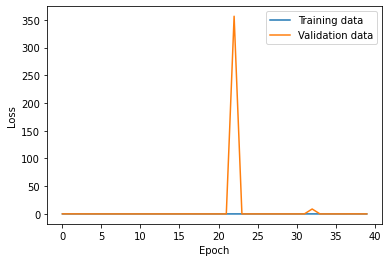

In [18]:
plot_loss(history)

# 6. Test (predict)

## test_data 불러오기

In [19]:
x_test_in = data.x_test_in
x_test_out = data.x_test_out

## 예측 진행

In [20]:
decoded_imgs = unet.predict(x_test_in)

## 시각화

In [21]:
import numpy as np
from sklearn.preprocessing import minmax_scale

In [22]:
def show_images(x_test_in, x_test_out, decoded_imgs):
    if backend.image_data_format() == 'channels_first':
        print(x_test_out.shape)
        x_test_out = x_test_out.swapaxes(1, 3).swapaxes(1, 2)
        print(x_test_out.shape)
        decoded_imgs = decoded_imgs.swapaxes(1, 3).swapaxes(1, 2)

        x_test_in = x_test_in[:, 0, ...]

    else:
        x_test_in = x_test_in[..., 0]
        
    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        if x_test_in.ndim < 4:
            plt.imshow(x_test_in[i], cmap='gray')
        else:
            plt.imshow(x_test_in[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n * 2)
        plt.imshow(x_test_out[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


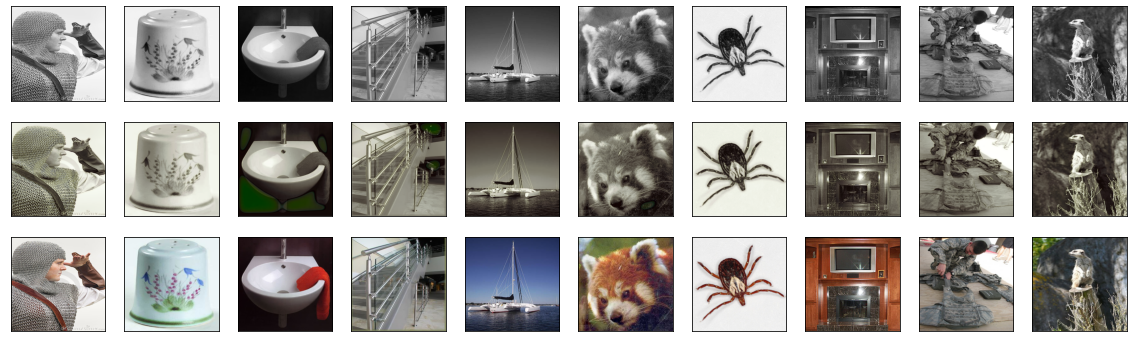

In [23]:
show_images(x_test_in, x_test_out, decoded_imgs)

# 7. Predict 된 이미지 size 복원 후 저장

## 함수화

In [24]:
import cv2
import time
from IPython.display import clear_output

In [25]:
def resize_and_save_restored_img(img_name_list, decoded_imgs, original_img_size, restored_img_path) :
    start = time.time()
    
    for i in range(len(img_name_list)) :

        clear_output(wait=True)

        restored_img_name = img_name_list[i]

        try:
            resized_restored_img = cv2.resize(decoded_imgs[i], dsize = original_img_size[i], interpolation = cv2.INTER_CUBIC)
            resized_restored_img = resized_restored_img*255.0
            resized_restored_img = resized_restored_img.astype('int64')
            cv2.imwrite(os.path.join(restored_img_path, restored_img_name), resized_restored_img)

        except:
            print('{}가 변환되지 않았습니다.'.format(restored_img_name))

        i += 1
        print('진행 상황 : ', i,'/',len(img_name_list))
        print('진행 시간 : ', round((time.time() - start), 2))

    print('총 걸린 시간 : ', round((time.time() - start),2), '초')

In [26]:
def load_object_by_pickle(pklfile):
    return pickle.load(open(pklfile, 'rb'))

## 저장에 사용되는 데이터 불러오기

### 사용된 이미지 이름

In [37]:
import glob
import os
from os import listdir, makedirs
from os.path import isfile, join

In [38]:
test_data_original_img_path = './data/test_data/original_img'
test_data_resized_img_path = './data/test_data/resized_img(512x512)'
test_data_img_name_list = list(filter(lambda f: isfile(join(test_data_original_img_path, f)), listdir(test_data_original_img_path)))

### 사용된 이미지의 원래 크기

In [39]:
test_data_original_img_size_path = './data/test_data/original_img_size.pkl'
test_data_original_img_size = load_object_by_pickle(test_data_original_img_size_path)

## 저장할 위치 선정

In [40]:
restored_img_path = './data/test_data/restored_img'

## resize 후 저장

In [41]:
resize_and_save_restored_img(test_data_img_name_list, decoded_imgs, test_data_original_img_size, restored_img_path)

진행 상황 :  99 / 99
진행 시간 :  0.29
총 걸린 시간 :  0.29 초


In [42]:
resized_restored_img2 = cv2.resize(decoded_imgs[3], dsize = test_data_original_img_size[3], interpolation = cv2.INTER_CUBIC)
resized_restored_img2 = resized_restored_img2*255.0
resized_restored_img2 = resized_restored_img2.astype('int64')
resized_restored_img2

array([[[125, 129, 115],
        [128, 128, 113],
        [127, 128, 114],
        ...,
        [123, 124, 111],
        [123, 125, 110],
        [118, 124, 108]],

       [[124, 122, 106],
        [129, 128, 106],
        [130, 129, 111],
        ...,
        [119, 117, 102],
        [124, 123, 104],
        [122, 123, 108]],

       [[126, 123, 108],
        [132, 129, 110],
        [137, 133, 118],
        ...,
        [110, 105,  94],
        [119, 116, 100],
        [118, 118, 104]],

       ...,

       [[123, 119, 105],
        [125, 121, 103],
        [118, 113, 100],
        ...,
        [131, 127, 112],
        [127, 123, 105],
        [122, 123, 108]],

       [[124, 122, 107],
        [126, 123, 104],
        [124, 121, 105],
        ...,
        [128, 126, 109],
        [127, 126, 106],
        [124, 124, 107]],

       [[130, 130, 118],
        [125, 124, 106],
        [123, 122, 106],
        ...,
        [127, 127, 110],
        [126, 126, 108],
        [120, 123, 109]]

In [43]:
cv2.imwrite('img2.jpg', resized_restored_img2)

True

In [44]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3932831444518230069
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23399170048
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15072765579079032524
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [45]:
def model_info_from_file(model_file):
    values = model_file[:-3].split('-')
    
    img_size = int(values[0].split('_')[-1])
    batch_size = int(values[1].split('_')[2])
    epoch = int(values[2])
    val_loss = float(values[3])
    loss = float(values[4])

    return [img_size, batch_size, epoch, val_loss, loss]

def get_best_model():
    model_list = []

    save_folder_path = './data/trained_model'

    pd_list = []
    for (path, dir, files_list) in os.walk(save_folder_path):
        for file in files_list:
            model_info_list = model_info_from_file(file)
            pd_list.append(model_info_list)
    pd_dataset = pd.DataFrame(pd_list, columns=['img_size', 'batch_size', 'epoch', 'val_loss', 'loss'])

    # val_loss 가 가장 낮은 것
    val_loss_model_info = pd_dataset.sort_values(by=['val_loss', 'val_acc', 'epoch'], ascending=[True, False, False]).values[0]
    val_loss_model_file = file_from_model_info(val_loss_model_info)
    model_list.append(val_loss_model_file)

In [46]:
# import keras

In [47]:
# model = keras.models.load_model('./data/trained_model/unet_model-img_size_512-batch_size_4-19-0.0074-0.0105.h5', custom_objects={'UNET': UNET})